In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cv2
import numpy as np
from skimage.color import label2rgb
from scipy.io import loadmat
import seaborn as sns

In [2]:
palette = sns.color_palette("Set1", 80)

In [3]:
def load_mat(mask_path):
    # Load in mask info from .mat file as numpy array
    x = loadmat(mask_path)

    # Add background class (0) in 0th layer
    mask = (x['type_map']==0).astype(int)
    mask = mask[:, :, None]

    # Add inflammatory classes (1, 2) in 1st layer
    temp = ((x['type_map']==1).astype(int) +\
         (x['type_map']==2).astype(int))[:, :, None]
    mask = np.concatenate((mask,temp), axis=2)

    # Add epithelial classes (3, 4) in 2nd layer
    temp = ((x['type_map']==3).astype(int) +\
         (x['type_map']==4).astype(int))[:, :, None]
    mask = np.concatenate((mask,temp), axis=2)

    # Add spindle-shaped classes (5, 6, 7) in 3rd layer
    temp = ((x['type_map']==5).astype(int) +\
         (x['type_map']==6).astype(int) +\
         (x['type_map']==7).astype(int))[:, :, None]
    mask = np.concatenate((mask,temp), axis=2)
    
    return mask.astype("float32")

In [4]:
# label_path = "/home/dkermany/data/COCO/masks/val2017/000000047740.png"
# image_path = "/home/dkermany/data/COCO/images/val2017/000000047740.jpg"
# pred_path = "/home/dkermany/data/COCO/images/val2017_predictions/000000047740.png"
image_path = "/home/dkermany/data/CoNSeP/Test/Images/test_1.png"
label_path = "/home/dkermany/data/CoNSeP/Test/Labels/test_1.mat"
pred_path = "/home/dkermany/data/CoNSeP/Test/Images_predictions/test_1.png"

(1000, 1000, 3)


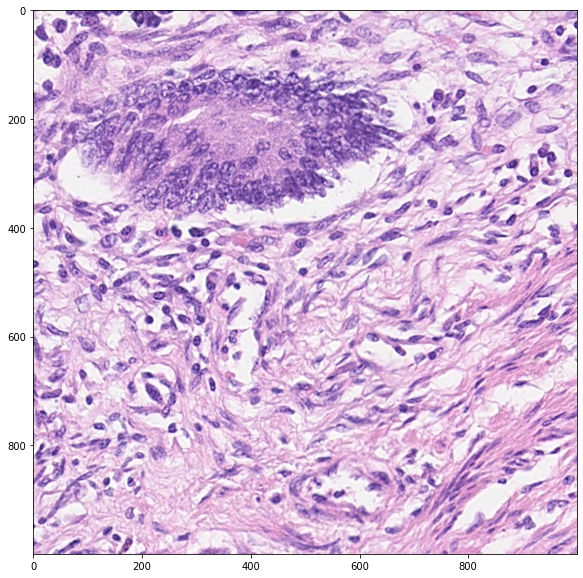

In [5]:
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
print(image.shape)
plt.figure(figsize=(10,10))
plt.imshow(image)

(1000, 1000)


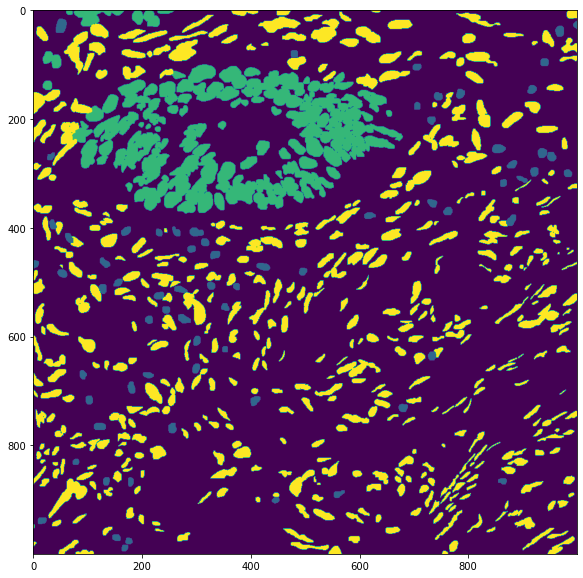

In [9]:
label = np.argmax(load_mat(label_path), axis=2)
print(label.shape)
plt.figure(figsize=(10,10))
plt.imshow(label)

(1000, 1000, 3)
[0 0 0]


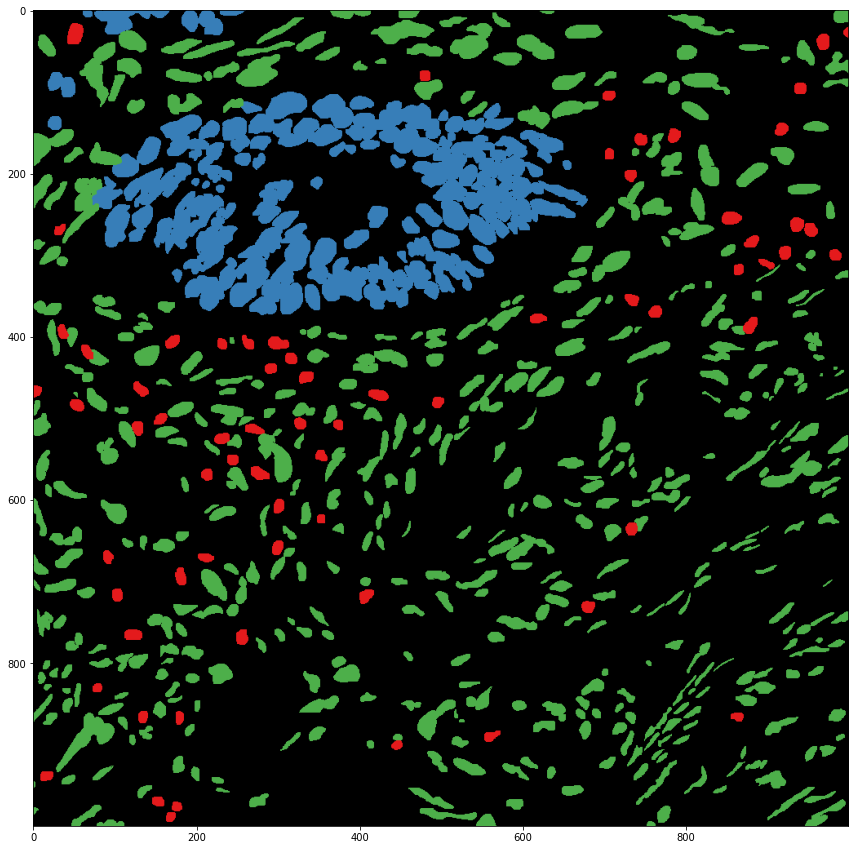

In [10]:
rgb_label = label2rgb(label, bg_label=0, colors=palette)
rgb_label = (rgb_label*255).astype("uint8")
plt.figure(figsize=(15,15))
plt.imshow(rgb_label)
print(rgb_label.shape)
print(rgb_label[150][200])

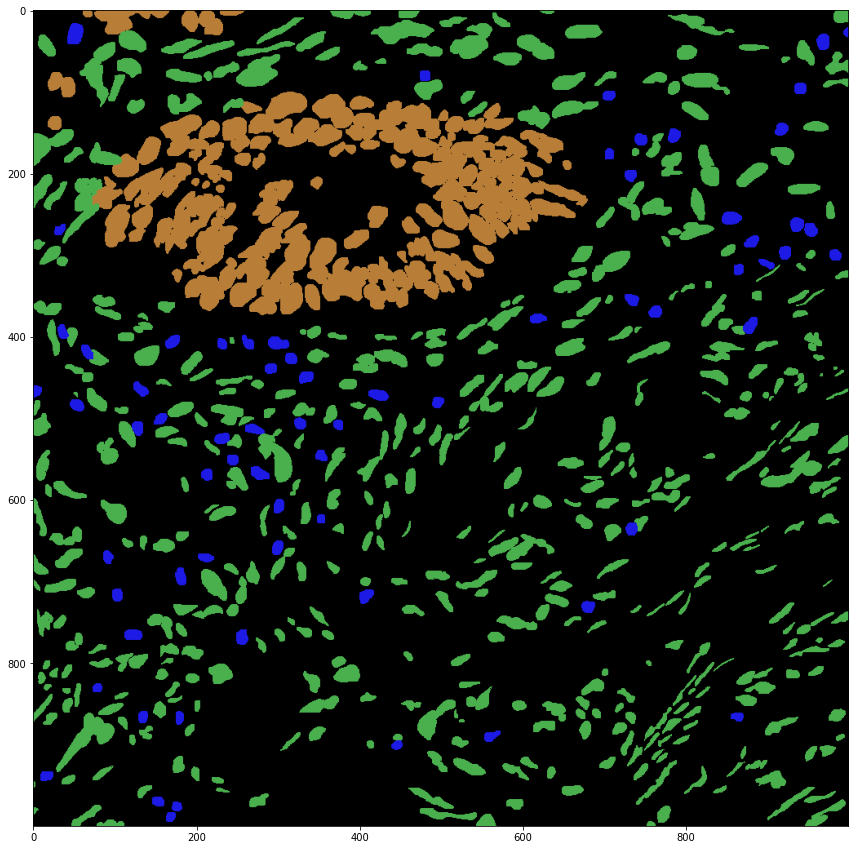

In [11]:
bgr_label = cv2.cvtColor(rgb_label, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(15,15))
plt.imshow(bgr_label)

[0]


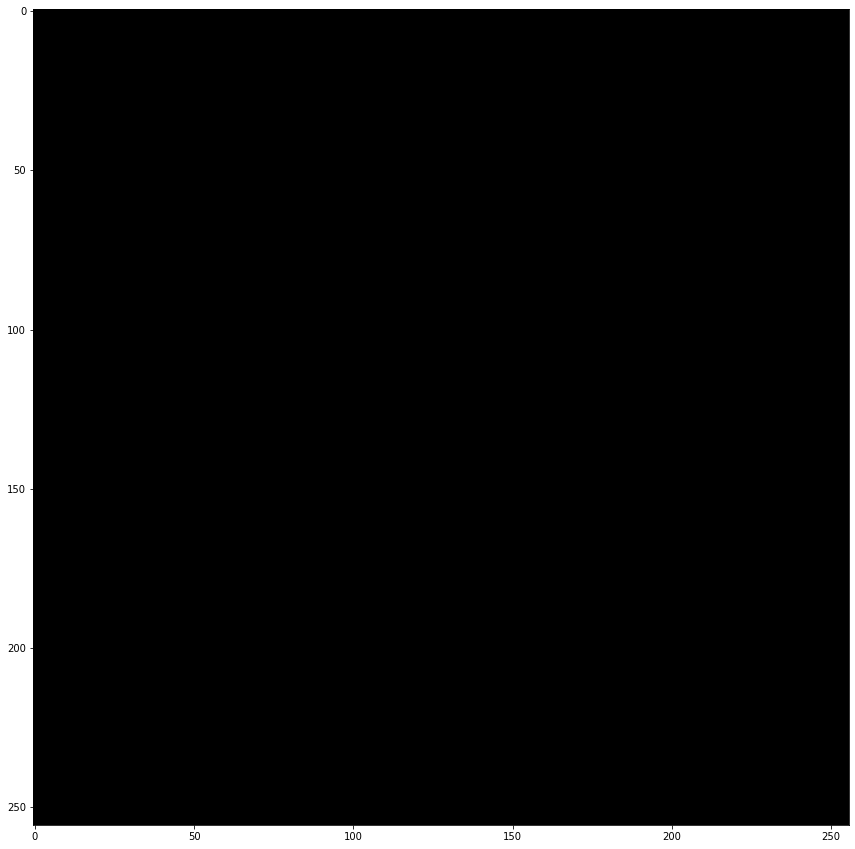

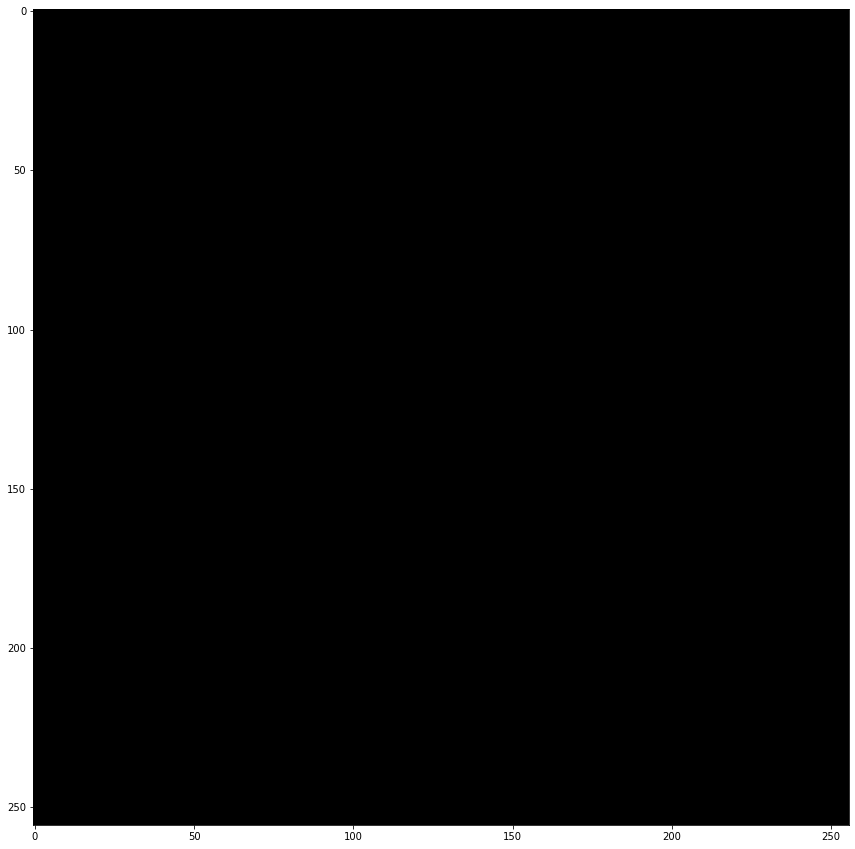

In [13]:
pred = cv2.imread(pred_path)
print(np.unique(pred))
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(pred, cv2.COLOR_BGR2RGB))
plt.figure(figsize=(15,15))
plt.imshow(pred)